In [ ]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# loading the dataset 
bank_df = pd.read_csv('/content/Bank Client Deposit Data set Classification.csv')
# display all the columns in the data set
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,4552,188,11,other,no


In [ ]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,3.885559,67.985794,1.0,1.0,2.0,3.0,7661.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_df.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
job,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
marital,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
education,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
default,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
balance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
housing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
loan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
contact,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
day,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
bank_df.isnull().sum().sum()

0

In [ ]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Replace "unknown" values with NaN
bank_df.replace("unknown", np.nan, inplace=True)

# Print the first few rows of the DataFrame to verify the replacement
print(bank_df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign  pdays  previous poutcome   y  
0     NaN    5   may       261         1     -1         0      NaN  no  
1     NaN    5   may       151         1     -1         0      NaN  no  
2     NaN    5   may        76         1     -1         0      NaN  no  
3     NaN    5   may        92         1     -1         0      NaN  no  
4     NaN    5   may       198         1     -1         0      NaN  no  


In [ ]:
# Select categorical columns (object data type)
cat_cols = bank_df.select_dtypes(include=["object"])

# Loop through each categorical column and print unique values
for col in cat_cols:
    print(f"Unique values for column '{col}':")
    print(bank_df[col].unique())
    print()

Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Unique values for column 'marital':
['married' 'single' 'divorced']

Unique values for column 'education':
['tertiary' 'secondary' nan 'primary']

Unique values for column 'default':
['no' 'yes']

Unique values for column 'housing':
['yes' 'no']

Unique values for column 'loan':
['no' 'yes']

Unique values for column 'contact':
[nan 'cellular' 'telephone']

Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for column 'poutcome':
[nan 'failure' 'other' 'success']

Unique values for column 'y':
['no' 'yes']



In [ ]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

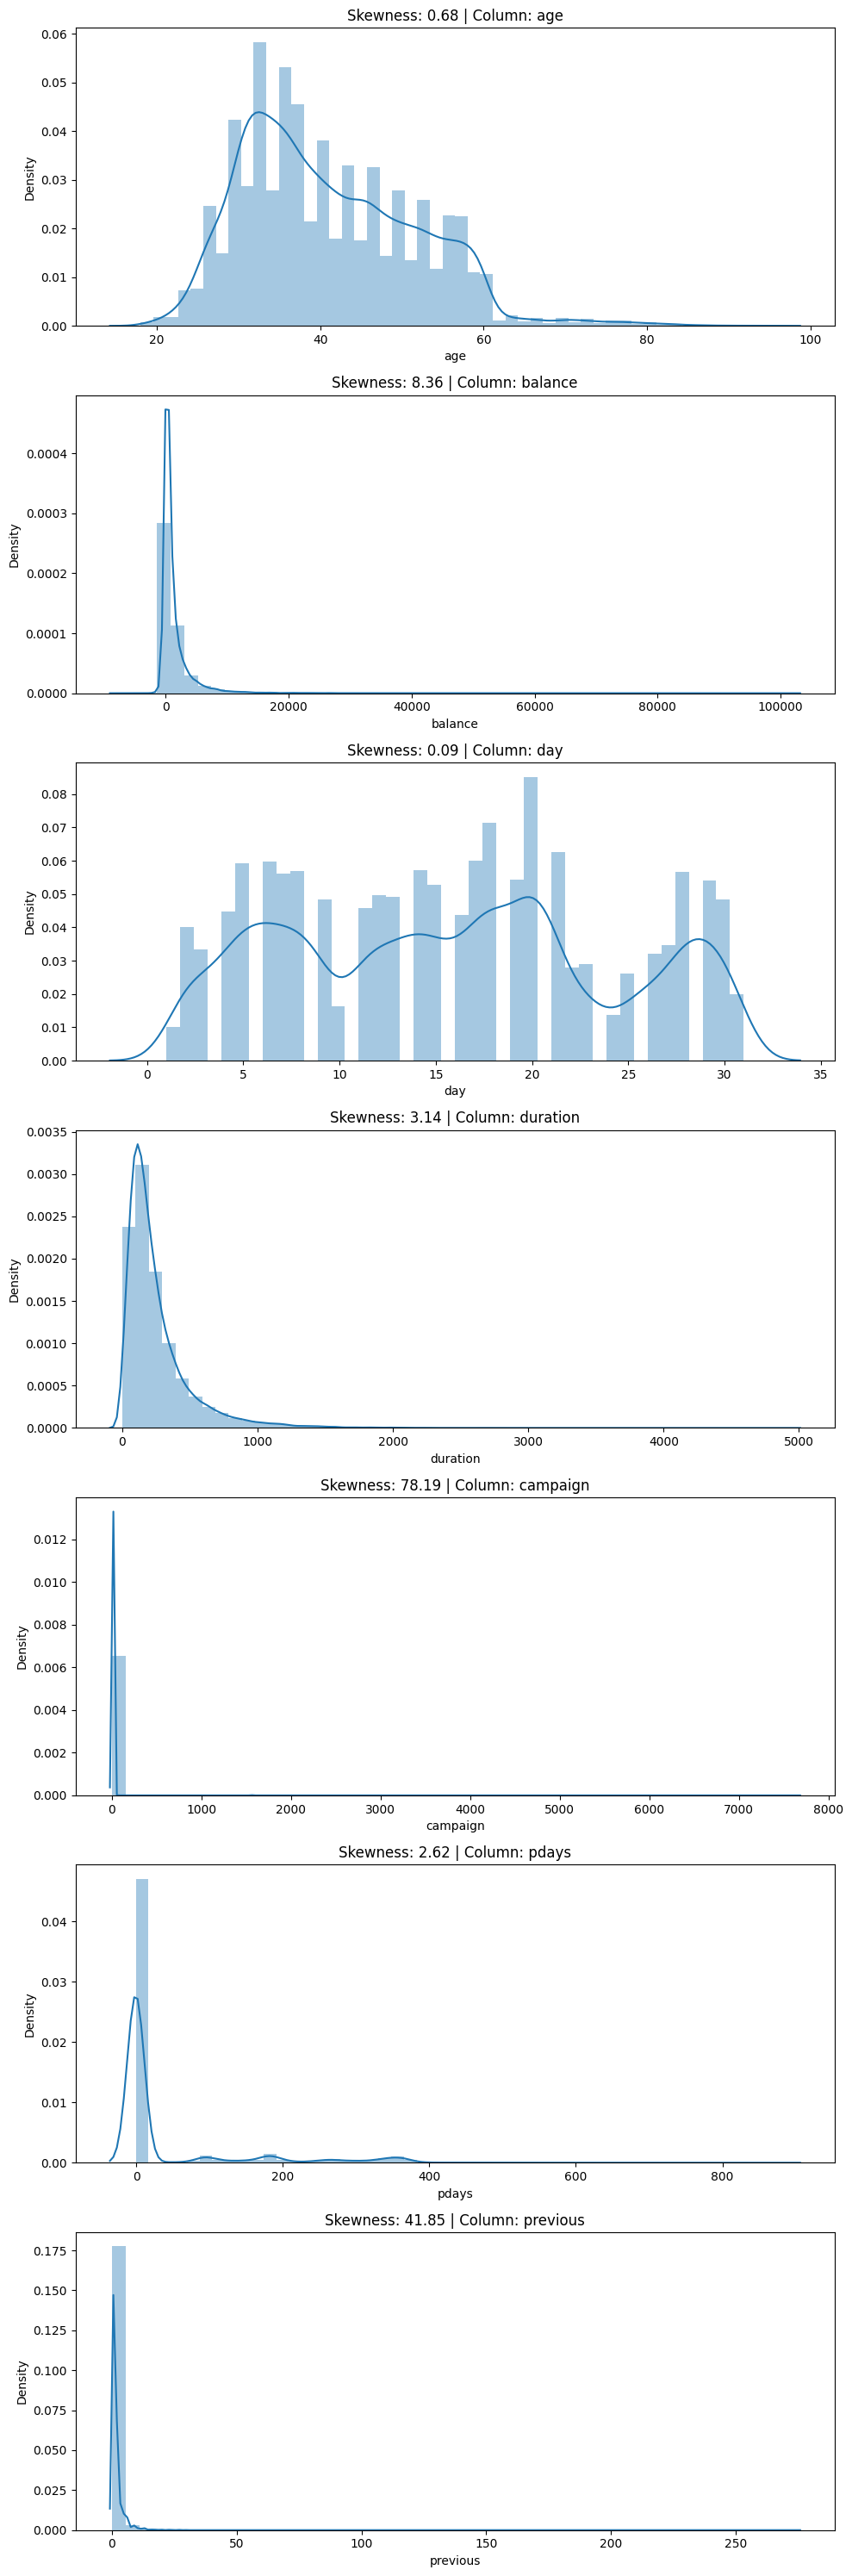

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get numeric columns in the dataset
numeric_cols = bank_df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 30))

# Iterate over each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.distplot(bank_df[col], ax=axes[i])
    axes[i].set_title("Skewness: {:.2f} | Column: {}".format(bank_df[col].skew(), col))

plt.tight_layout()
plt.show()


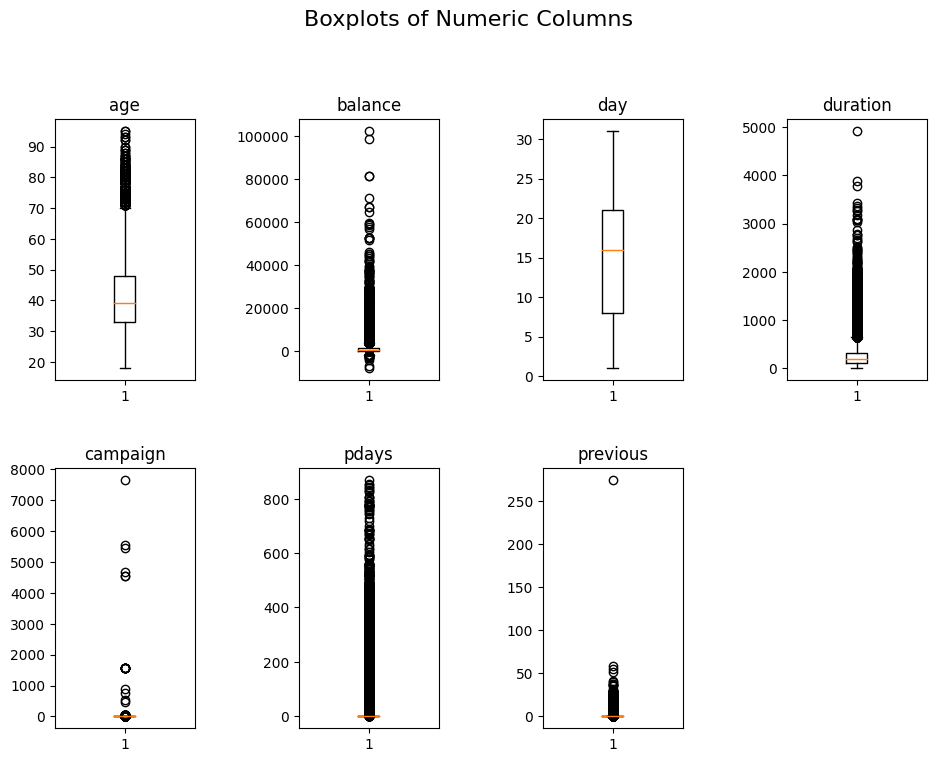

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get numeric columns in the dataset
numeric_cols = bank_df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    # Plot boxplot on current subplot
    if i < len(axes.flat):
        ax = axes.flat[i]
        ax.boxplot(bank_df[col].dropna())
        ax.set_title(col)

# Hide empty subplots
for j in range(i + 1, len(axes.flat)):
    axes.flat[j].axis('off')

# Set overall title and adjust layout
fig.suptitle('Boxplots of Numeric Columns', fontsize=16)
fig.tight_layout(pad=3.0)


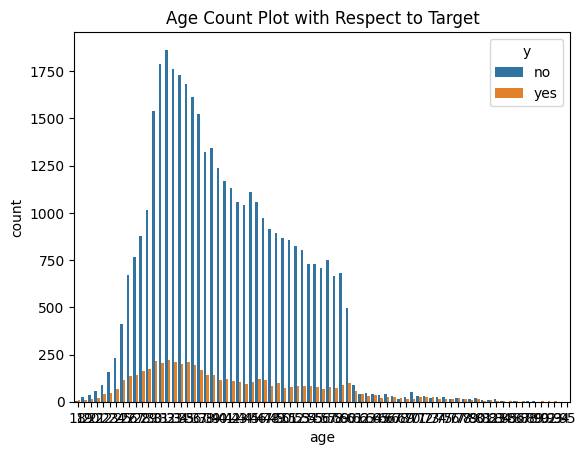

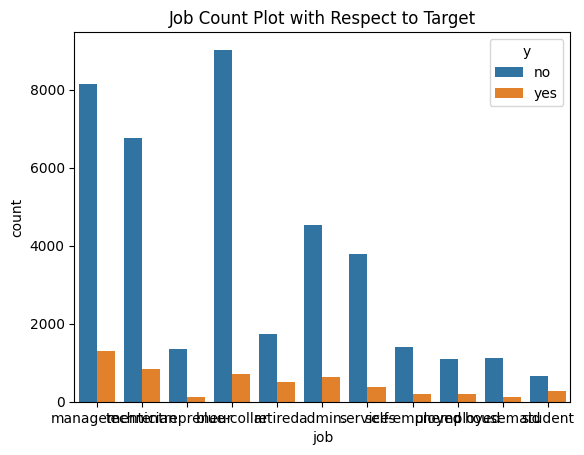

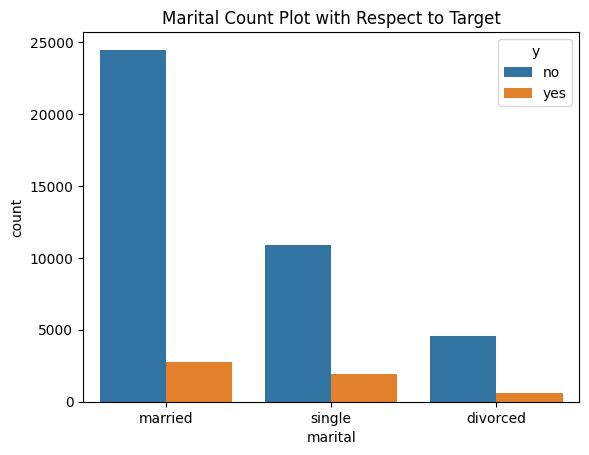

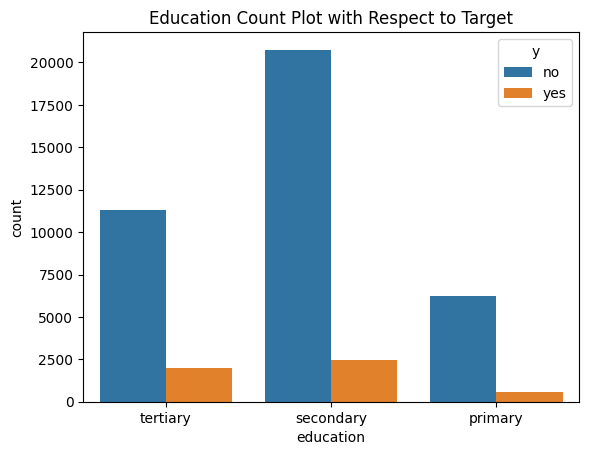

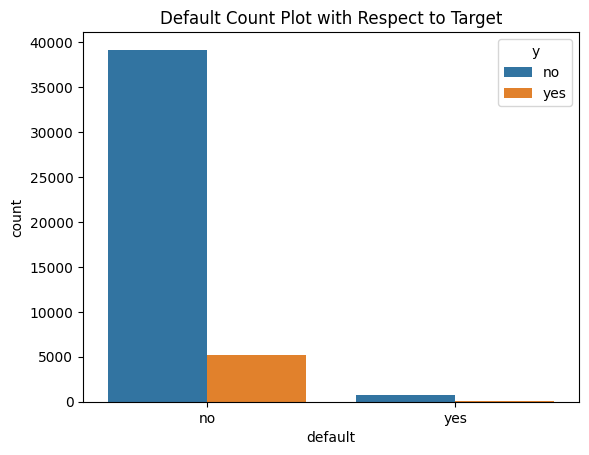

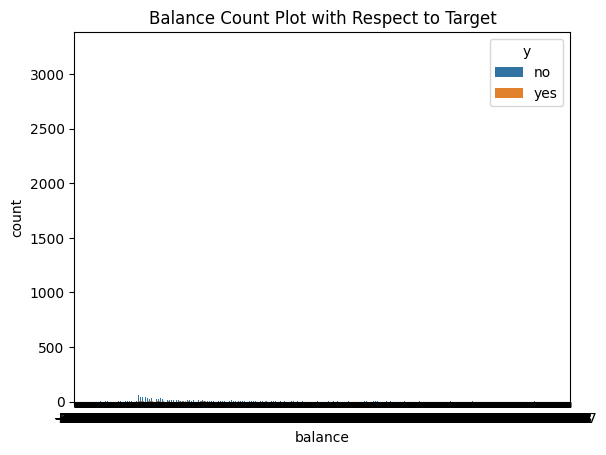

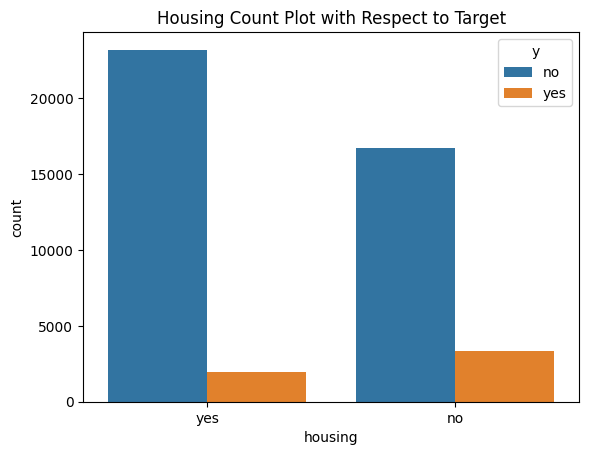

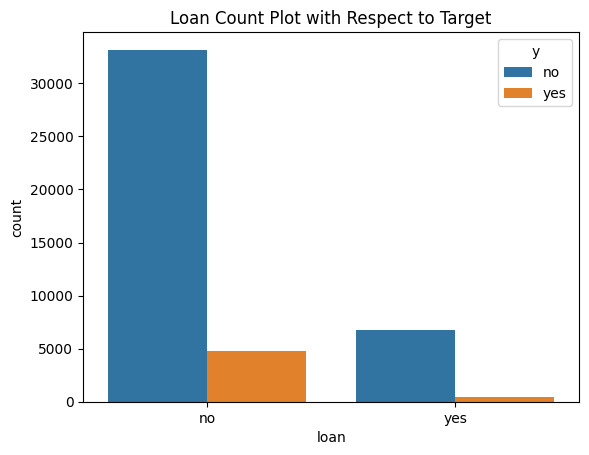

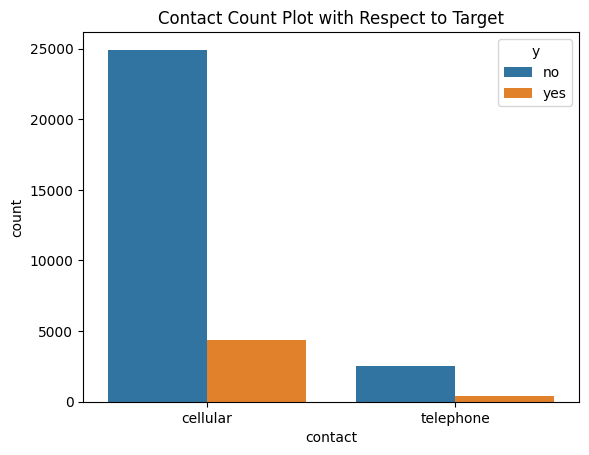

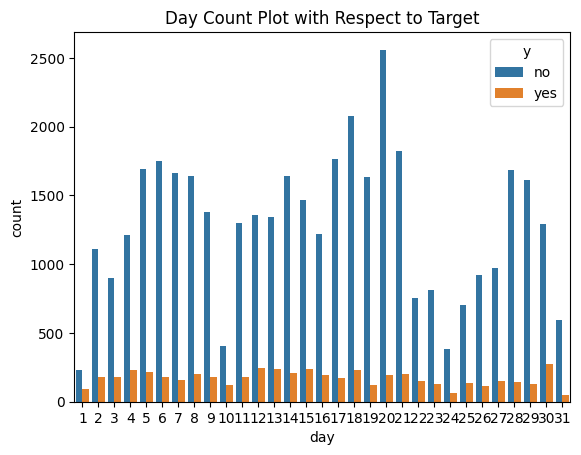

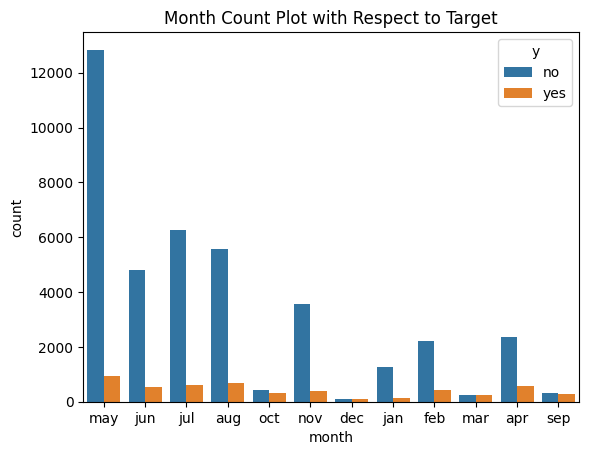

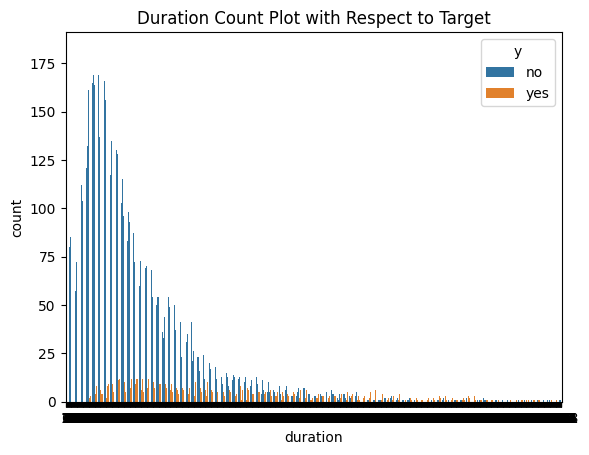

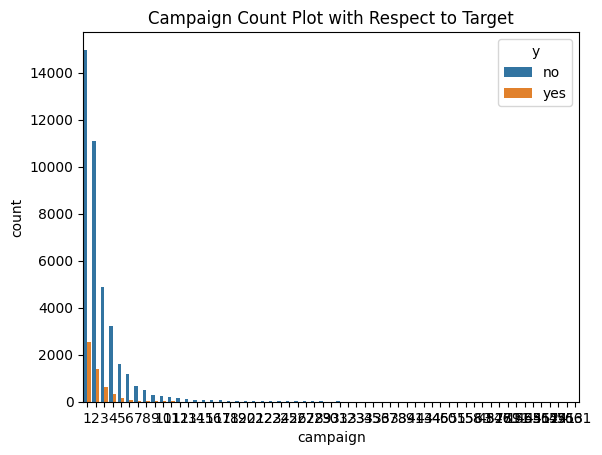

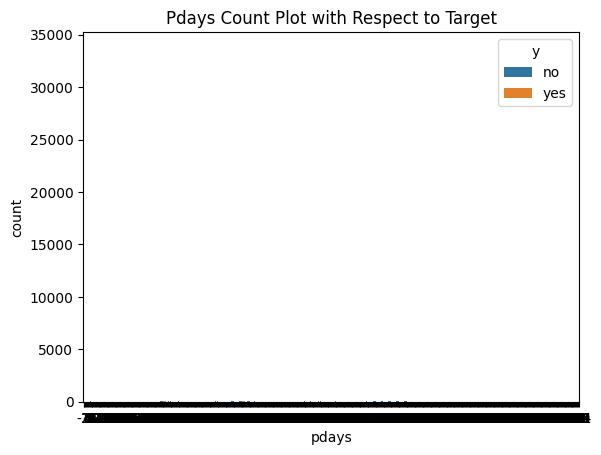

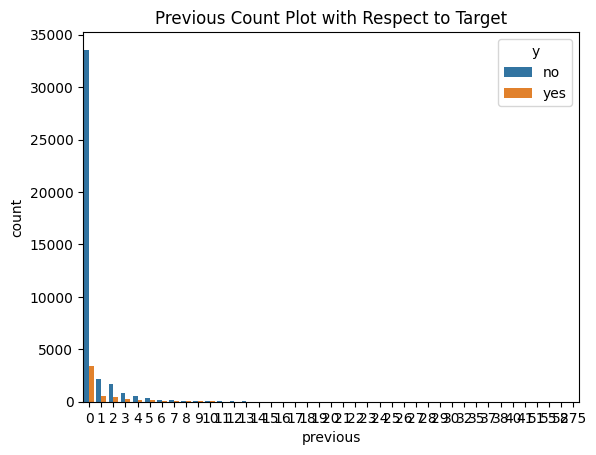

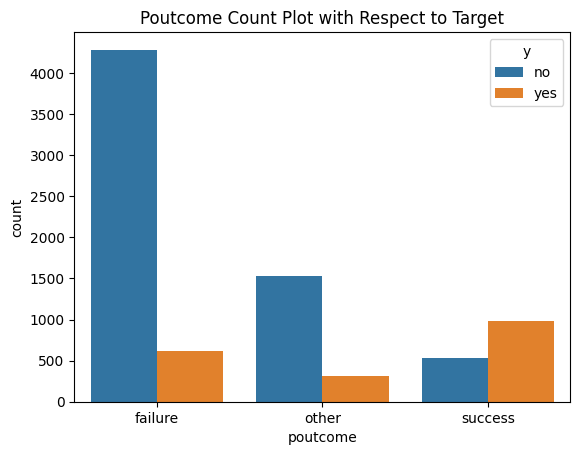

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all columns except the target column
for col in bank_df.columns.drop("y"):
    # Create count plot for the current column with respect to the target column
    sns.countplot(data=bank_df, x=col, hue="y")
    plt.title(f"{col.capitalize()} Count Plot with Respect to Target")
    plt.show()


In [ ]:
def label_encode(data):
    return pd.factorize(data)[0]

class LabelEncoder:
    def __init__(self):
        self.labels = {}
        self.rev_labels = {}
       
    def fit(self, X, y=None):
        unique_values = np.unique(X)
        for i, val in enumerate(unique_values):
            self.labels[val] = i
            self.rev_labels[i] = val
        return self
   
    def transform(self, X):
        X_encoded = np.zeros_like(X)
        for val, label in self.labels.items():
            X_encoded[X == val] = label
        return X_encoded
   
    def inverse_transform(self, X_encoded):
        X = np.zeros_like(X_encoded)
        for label, val in self.rev_labels.items():
            X[X_encoded == label] = val
        return X

# Convert non-numeric columns to numeric using label encoding
for col in bank_df.columns:
    if bank_df[col].dtype == 'object':
        bank_df[col] = label_encode(bank_df[col])


In [ ]:
class KNeighborsClassifier:
    """A k-nearest neighbors classifier"""
    def __init__(self, n_neighbors=5, weights='uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
    
    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self
    
    def predict(self, X):
        distances = np.sqrt(np.sum((X[:, None, :] - self.X_) ** 2, axis=2))
        if self.weights == 'uniform':
            weights = np.ones(distances.shape)
        elif self.weights == 'distance':
            weights = 1 / distances
        else:
            raise ValueError(f"Invalid weight: {self.weights}")
        indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            labels = self.y_[indices[i]]
            weights_i = weights[i][indices[i]]
            if self.weights == 'uniform':
                y_pred[i] = np.bincount(labels).argmax()
            else:
                y_pred[i] = np.bincount(labels, weights=weights_i).argmax()
        return y_pred

class Pipeline:
    """A pipeline class that applies a sequence of transformations"""
    def __init__(self, steps):
        self.steps = steps
    
    def fit(self, X, y=None):
        for step in self.steps:
            X = step.fit_transform(X, y)
        return self
    
    def transform(self, X):
        for step in self.steps:
            X = step.transform(X)
        return X

# Define the KNN classifier pipeline
class KNNPipeline:
    def __init__(self, preprocessor, knn):
        self.preprocessor = preprocessor
        self.knn = knn

    def fit(self, X, y=None):
        X, y = self.preprocessor.fit_transform(X, y)
        self.knn.fit(X, y)
        return self

    def predict(self, X):
        X, _ = self.preprocessor.fit_transform(X)
        return self.knn.predict(X)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [ ]:

def zscore(X, threshold=3):
    """Detect and treat outliers using the Z-score"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    z_scores = np.abs((X - mean) / std)
    is_outlier = z_scores > threshold
    X_treated = np.where(is_outlier, mean, X)
    return X_treated

def handle_missing_values(X, strategy='mean'):
    """Handle missing values by filling in with the mean or most frequent value"""
    if strategy == 'mean':
        fill_value = np.nanmean(X, axis=0)
    elif strategy == 'most_frequent':
        fill_value = np.nanmedian(X, axis=0)
    else:
        raise ValueError(f"Invalid strategy: {strategy}")
    X_filled = np.where(np.isnan(X), fill_value, X)
    return X_filled

def handle_special_characters(X, value=-1):
    """Replace special characters with a specified value"""
    X[X == '?'] = value
    return X

class SimpleImputer:
    """A simple imputer class that fills missing values with the mean or most frequent value"""
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.fill_value = None
    
    def fit(self, X):
        if self.strategy == 'mean':
            self.fill_value = np.nanmean(X, axis=0)
        elif self.strategy == 'most_frequent':
            self.fill_value = np.nanmedian(X, axis=0)
        else:
            raise ValueError(f"Invalid strategy: {self.strategy}")
        return self
    
    def transform(self, X):
        if self.fill_value is None:
            raise ValueError("SimpleImputer has not been fit yet.")
        X_filled = np.where(np.isnan(X), self.fill_value, X)
        return X_filled
    
class StandardScaler:
    """A standard scaler class that standardizes the features"""
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X):
        self.mean_ = np.nanmean(X, axis=0)
        self.std_ = np.nanstd(X, axis=0)
        return self
    
    def transform(self, X):
        if self.mean_ is None or self.std_ is None:
            raise ValueError("StandardScaler has not been fit yet.")
        X_scaled = (X - self.mean_) / self.std_
        return X_scaled


# Define train-test-split function
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:n_test]
    train_indices = shuffled_indices[n_test:]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Define the preprocessing steps for numeric and categorical columns
class NumericTransformer:
    def __init__(self, zscore, handle_missing_values, scaler):
        self.zscore = zscore
        self.handle_missing_values = handle_missing_values
        self.scaler = scaler

    def fit_transform(self, X, y=None):
        X = self.zscore(X)
        X = self.handle_missing_values(X)
        X = self.scaler(X)
        return X


class CategoricalTransformer:
    def __init__(self, handle_special_characters, onehot_encoder):
        self.handle_special_characters = handle_special_characters
        self.label_encoder = label_encode

    def fit_transform(self, X, y=None):
        X = self.handle_special_characters(X)
        X = self.label_encoder(X)
        return X


class TargetTransformer:
    def __init__(self, label_encoder):
        self.label_encoder = label_encoder

    def fit_transform(self, X, y=None):
        y = self.label_encoder(y)
        return y


# Define the preprocessing pipeline with feature scaling, encoding, and label encoding
class Preprocessor:
    def __init__(self, numeric_transformer, categorical_transformer, target_transformer):
        self.numeric_transformer = numeric_transformer
        self.categorical_transformer = categorical_transformer
        self.target_transformer = target_transformer

    def fit_transform(self, X, y=None):
        X = self.numeric_transformer.fit_transform(X)
        X = self.categorical_transformer.fit_transform(X)
        y = self.target_transformer.fit_transform(y)
        return X, y


In [ ]:
class ColumnTransformer:
    """A column transformer class that applies different transformations to different columns"""
    def __init__(self, transformers):
        self.transformers = transformers
    
    def fit(self, X):
        self.transformers_ = []
        for name, transformer, columns in self.transformers:
            transformer.fit(X[:, columns])
            self.transformers_.append((name, transformer, columns))
        return self
    
    def transform(self, X):
        X_transformed = []
        for name, transformer, columns in self.transformers_:
            X_transformed.append(transformer.transform(X[:, columns]))
        return np.hstack(X_transformed)

In [ ]:
# set a seed for reproducibility
np.random.seed(123)

# shuffle the data
bank = bank_df.sample(frac=1, random_state=123).reset_index(drop=True)

# define the percentage of data to use for training
train_pct = 0.8

# split the data into training and testing sets
train_size = int(len(bank) * train_pct)
X_train, y_train = bank.iloc[:train_size, :-1].values, bank.iloc[:train_size, -1].values
X_test, y_test = bank.iloc[train_size:, :-1].values, bank.iloc[train_size:, -1].values


# Define the column indices or names for numeric and categorical columns
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Define the preprocessing steps for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('outlier_treatment', zscore),
    ('missing_value_handling', handle_missing_values),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('label_encoding', LabelEncoder())
])

# Define the preprocessing pipeline with feature scaling and label encoding
preprocessor = ColumnTransformer(transformers=[  
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define the KNN classifier pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])


# Define the X and y variables
X = bank_df.drop("y", axis=1)
y = bank_df["y"]





In [ ]:
X.shape

(45211, 16)

In [ ]:

y.shape



(45211,)

In [ ]:
X=np.array(X) # converting X into numpy array
y=np.array(y) # converting y into numpy array



In [ ]:
print(X)



[[ 58   0   0 ...  -1   0  -1]
 [ 44   1   1 ...  -1   0  -1]
 [ 33   2   0 ...  -1   0  -1]
 ...
 [ 72   4   0 ... 184   3   2]
 [ 57   3   0 ...  -1   0  -1]
 [ 37   2   0 ... 188  11   1]]


In [ ]:
print(y)


[0 0 0 ... 1 0 0]


In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Fit the KNN classifier on the training data
knn = KNeighborsClassifier()
# Fit the KNN classifier pipeline on the training data
knn.fit(X_train, y_train)


In [ ]:
# Make predictions on the testing data
y_pred = knn.predict(X_test)

In [ ]:
# Calculate the number of true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test[i] == 1:
        tp += 1
    elif y_pred[i] == 0 and y_test[i] == 0:
        tn += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_test[i] == 1:
        fn += 1

# Calculate accuracy, precision, recall, and f1 score
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))


Accuracy: 0.88
Precision: 0.47
Recall: 0.28
F1 Score: 0.35
